<a href="https://colab.research.google.com/github/DrShabirAhmad/Code/blob/main/Uber_Root_Cause_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import warnings
warnings.simplefilter('ignore')

sns.set_style('whitegrid')

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving uber-data.csv to uber-data.csv


In [ ]:
df = pd.read_csv('uber-data.csv', parse_dates=[4,5], dayfirst= True, na_values="NA")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [ ]:
# Shape of the dataset -

print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 6745
No. of cols: 6


In [ ]:
# Checking for null values -

df.isnull().sum() / len(df) * 100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [ ]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
# Checking for duplicate rows -

print("No. of duplicate rows: ", df.duplicated().sum())

No. of duplicate rows:  0


In [ ]:
# Extract hour from the Request timestamp -

df["RequestHour"] = df["Request timestamp"].dt.hour
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [ ]:
# Separate 5 different timeslots from the Hour - Dawn, Early Morning, Noon, Late Evening, Night -

df["TimeSlot"] = df["RequestHour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning"
                                                                        if x<=9 else ("Noon"
                                                                                      if x<=16 else ("Late Evening"
                                                                                                     if x<=21 else "Night"))))

In [ ]:
df.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot
4622,1404,Airport,NaN,No Cars Available,2016-07-12 02:56:00,NaT,2,Dawn
5913,4982,Airport,NaN,No Cars Available,2016-07-14 18:47:23,NaT,18,Late Evening
1377,2397,City,144.0,Trip Completed,2016-07-12 19:45:00,2016-07-12 20:19:00,19,Late Evening
1820,6261,Airport,191.0,Trip Completed,2016-07-15 18:07:05,2016-07-15 19:07:36,18,Late Evening
912,1800,City,94.0,Trip Completed,2016-07-12 09:09:00,2016-07-12 10:05:00,9,Early Morning


In [20]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [21]:
# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand -

df["Cab Availability"] = df["Status"].apply(lambda x: "Available" if x=="Trip Completed" else "Not Available")

In [22]:
df['Cab Availability'].value_counts(normalize=True)*100

Not Available    58.028169
Available        41.971831
Name: Cab Availability, dtype: float64

In [23]:
df['Cab Availability'].value_counts()

Not Available    3914
Available        2831
Name: Cab Availability, dtype: int64

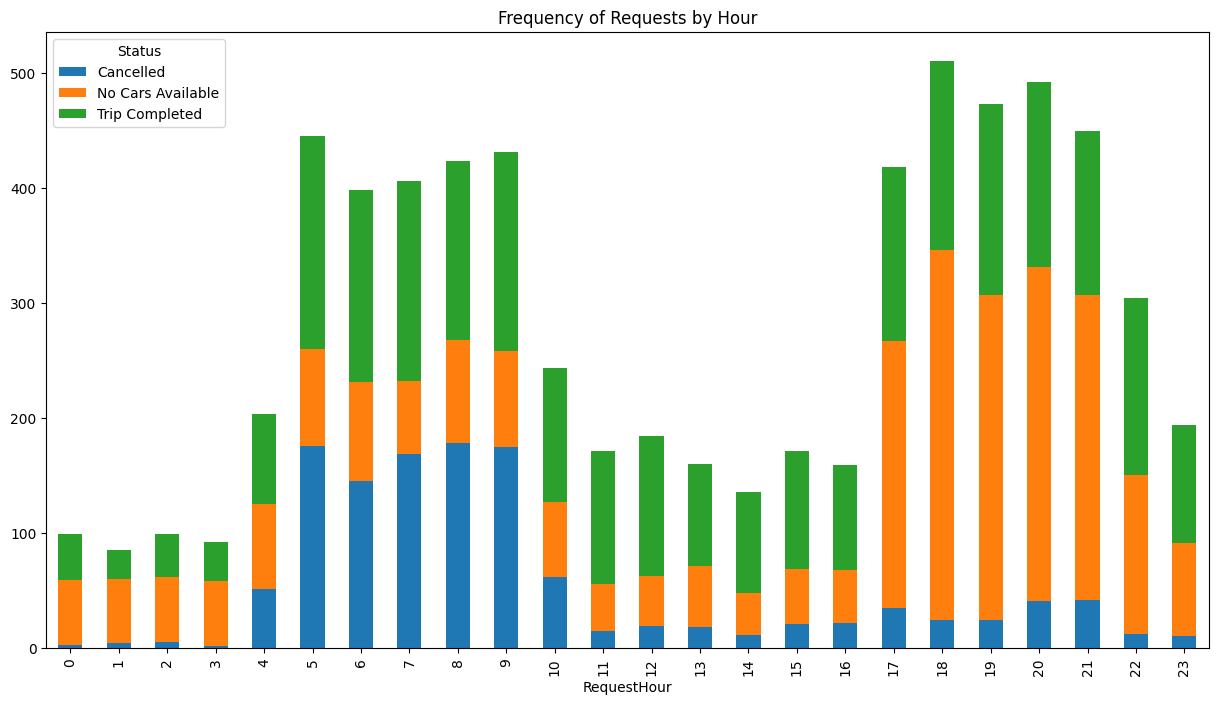

In [25]:
# Frequency of Requests by Hour -

df.groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Frequency of Requests by Hour')
plt.show()

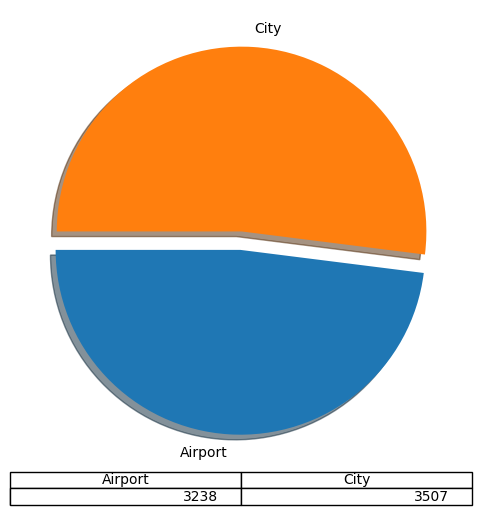

In [29]:
# Types of Requests (city-airport or airport-city) -

df.groupby(['Pickup point']).size().plot(kind="pie", startangle=180, explode=(0.05, .05), shadow=True, stacked=True, figsize=(6, 6), table=True)
plt.ylabel("")
plt.show()

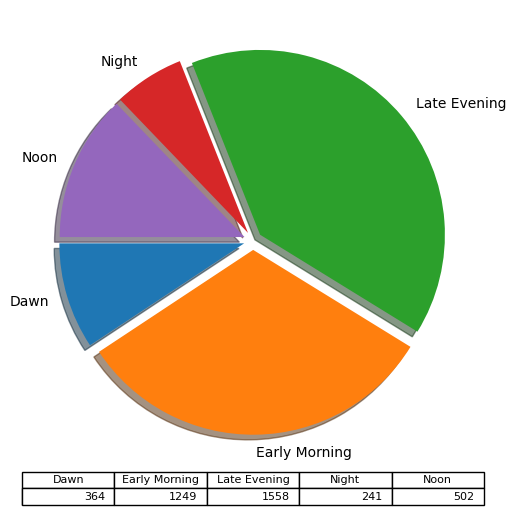

In [33]:
# Distribution of Time Slots -

df[(df["Cab Availability"]=="Not Available")].groupby(['TimeSlot']).size().plot(kind="pie", radius = 1, startangle=180, explode=(0.05,.05,0.05,.05,0.05), shadow=True, stacked=True, figsize=(6, 6), table=True)
plt.ylabel("")
plt.show()

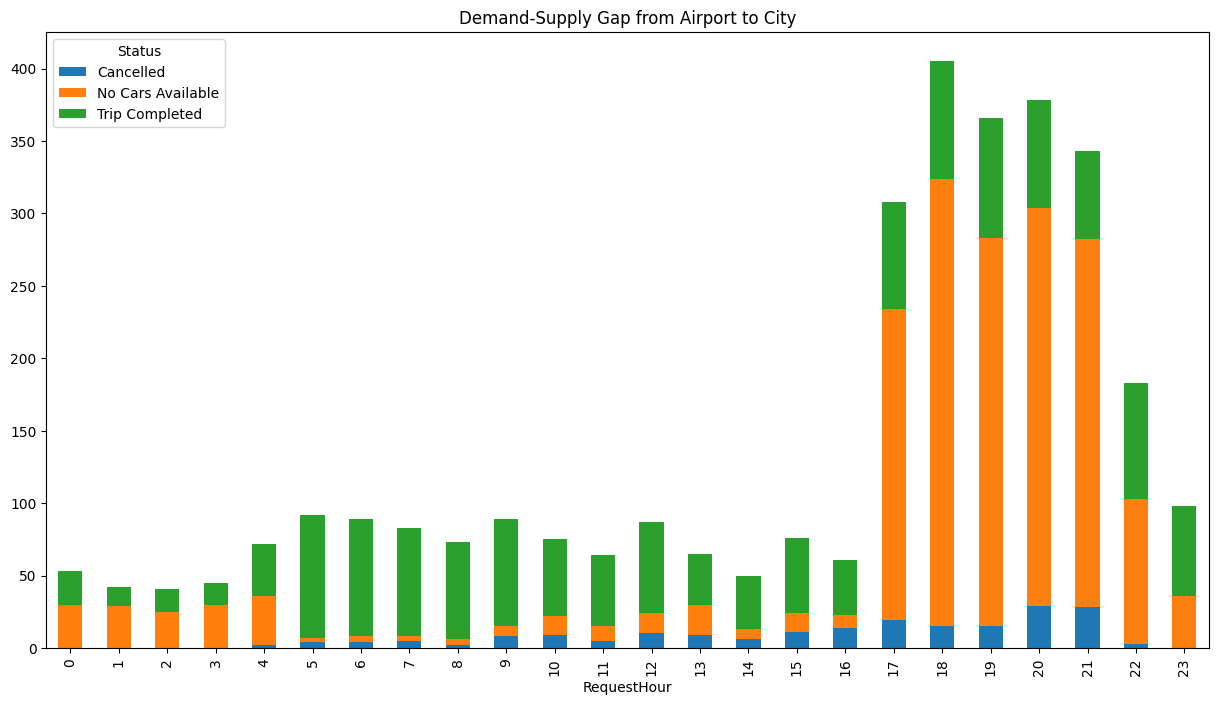

In [34]:
# Demand-Supply Gap from Airport to City -

df[(df['Pickup point']=="Airport")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Demand-Supply Gap from Airport to City')
plt.show()

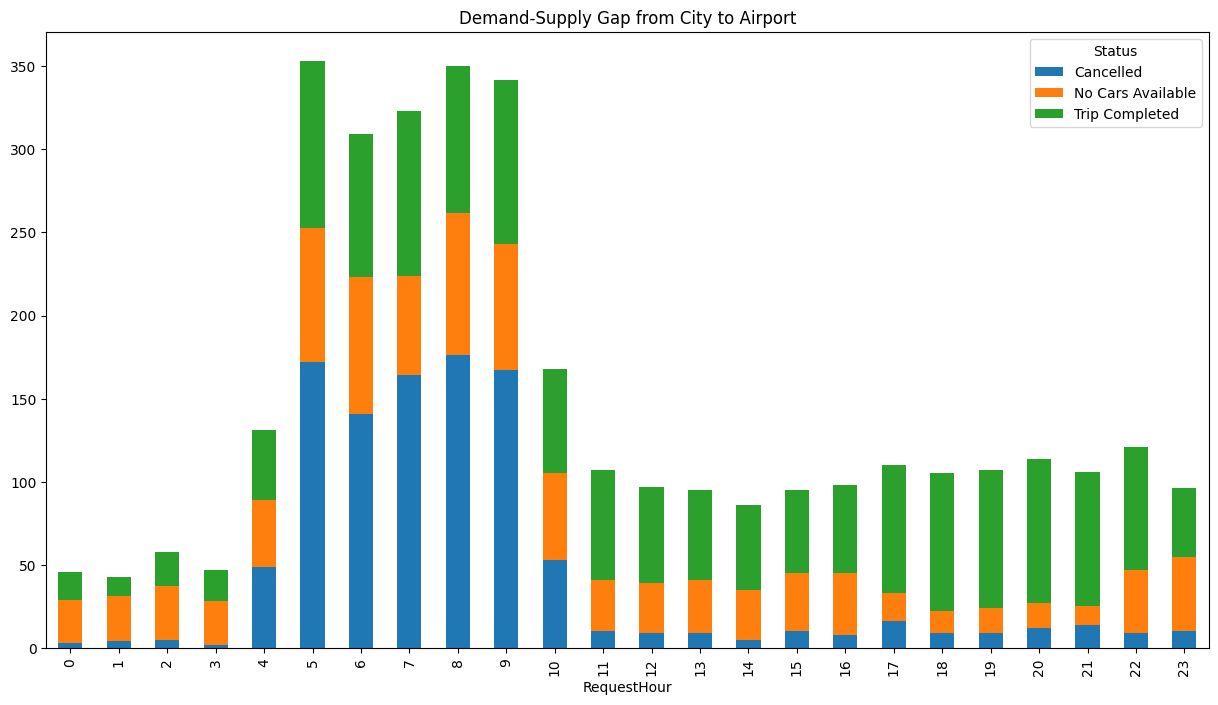

In [35]:
# Demand-Supply Gap from City to Airport -

df[(df['Pickup point']=="City")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Demand-Supply Gap from City to Airport')
plt.show()